In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("emnist-balanced-train.csv")
test_df = pd.read_csv("emnist-balanced-test.csv")

print(train_df.head())


print(f"Train Shape: {train_df.shape}, Test Shape: {test_df.shape}")


   45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.524  0.525  0.526  \
0  36  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  43  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  15  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  42  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.527  0.528  0.529  0.530  0.531  0.532  0.533  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Train Shape: (112799, 785), Test Shape: (18799, 785)


In [109]:
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")


In [110]:
# # Fix extra dimensions
# X_train = np.squeeze(X_train)  # Removes any extra 1-dimensions
# X_test = np.squeeze(X_test)

# # Ensure correct shape (N, 28, 28, 1)
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)

# print(f"Fixed X_train shape: {X_train.shape}")  # Should be (N, 28, 28, 1)


In [120]:
X_train.shape

(72189, 28, 28, 1)

Fixed Training Shape: (72189, 28, 28, 1)


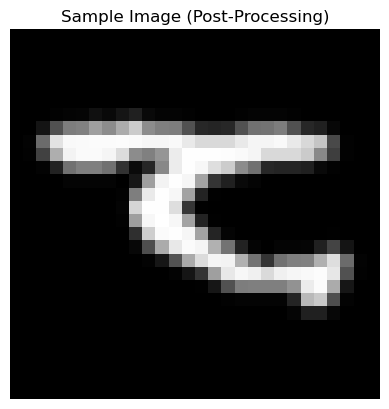


Final Dataset Statistics:
Shape: (72189, 28, 28, 1)
Mean: -0.0000, Std Dev: 1.0000


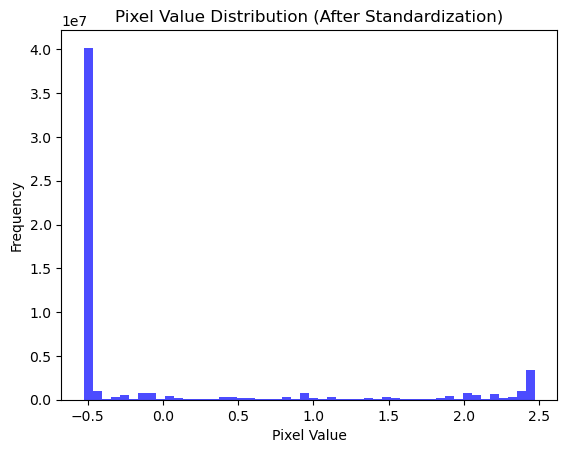

In [119]:
import numpy as np
import matplotlib.pyplot as plt


X_train = X_train.astype("float32")
X_test = X_test.astype("float32")


X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Remove extra dimension if it exists

X_train = np.squeeze(X_train, axis=-1)  # Remove last axis if (28, 28, 1, 1)
X_test = np.squeeze(X_test, axis=-1)


print(f"Fixed Training Shape: {X_train.shape}")  # Should be (N, 28, 28, 1)


plt.imshow(X_train[0], cmap="gray")
plt.title("Sample Image (Post-Processing)")
plt.axis("off")
plt.show()


print("\nFinal Dataset Statistics:")
print(f"Shape: {X_train.shape}")
print(f"Mean: {np.mean(X_train):.4f}, Std Dev: {np.std(X_train):.4f}")

plt.hist(X_train.flatten(), bins=50, color="blue", alpha=0.7)
plt.title("Pixel Value Distribution (After Standardization)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


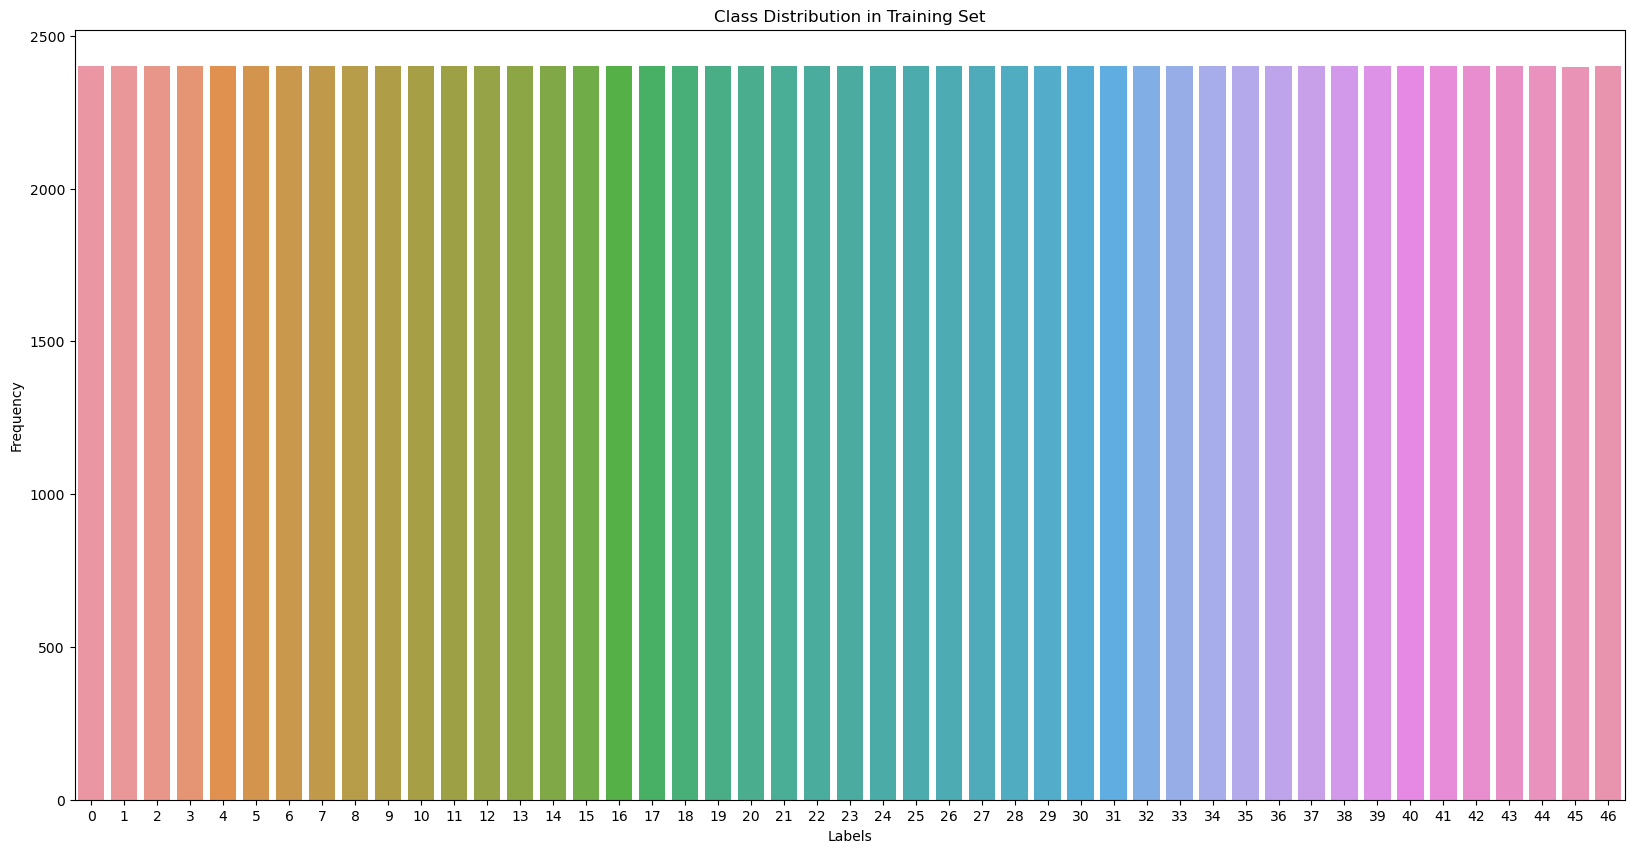

In [121]:
plt.figure(figsize=(20,10))
sns.countplot(x=train_df.iloc[:,0])  
plt.title("Class Distribution in Training Set")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.show()



In [122]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

print(f"Train Shape After Removing Duplicates: {train_df.shape}")
print(f"Test Shape After Removing Duplicates: {test_df.shape}")


Train Shape After Removing Duplicates: (112797, 785)
Test Shape After Removing Duplicates: (18799, 785)


In [123]:

train_data = train_df.to_numpy()
test_data = test_df.to_numpy()

X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]


X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0


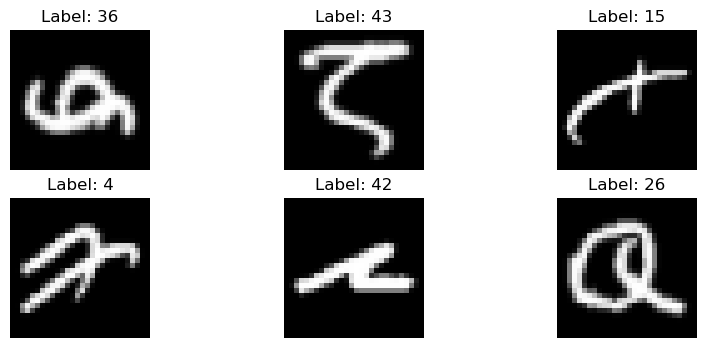

In [124]:
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i].squeeze(), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np



In [127]:
  

num_classes = len(np.unique(y_train)) 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}")



Training Shape: (90237, 28, 28, 1), Validation Shape: (22560, 28, 28, 1), Test Shape: (18799, 28, 28, 1)


In [128]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])




/Users/rounakagrawal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95**epoch)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.1  
)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),  
    validation_data=(X_val, y_val),
    epochs=20,
    callbacks=[lr_schedule]  
)


Epoch 1/20


/Users/rounakagrawal/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1410/1410 ━━━━━━━━━━━━━━━━━━━━ 420s 297ms/step - accuracy: 0.6268 - loss: 1.3288 - val_accuracy: 0.8305 - val_loss: 0.4789 - learning_rate: 0.0010
Epoch 2/20
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 426s 302ms/step - accuracy: 0.8306 - loss: 0.4942 - val_accuracy: 0.8672 - val_loss: 0.3770 - learning_rate: 9.5000e-04
Epoch 3/20
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 205s 146ms/step - accuracy: 0.8503 - loss: 0.4319 - val_accuracy: 0.8768 - val_loss: 0.3355 - learning_rate: 9.0250e-04
Epoch 4/20
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 105s 75ms/step - accuracy: 0.8572 - loss: 0.4015 - val_accuracy: 0.8707 - val_loss: 0.3502 - learning_rate: 8.5737e-04
Epoch 5/20
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 107s 76ms/step - accuracy: 0.8642 - loss: 0.3815 - val_accuracy: 0.8808 - val_loss: 0.3373 - learning_rate: 8.1451e-04
Epoch 6/20
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 130s 92ms/step - accuracy: 0.8696 - loss: 0.3595 - val_accuracy: 0.8851 - val_loss: 0.3095 - learning_rate: 7.7378e-04
Epoch 7/20
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 129s

In [136]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



588/588 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8907 - loss: 0.2996
Test Accuracy: 0.8941


588/588 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


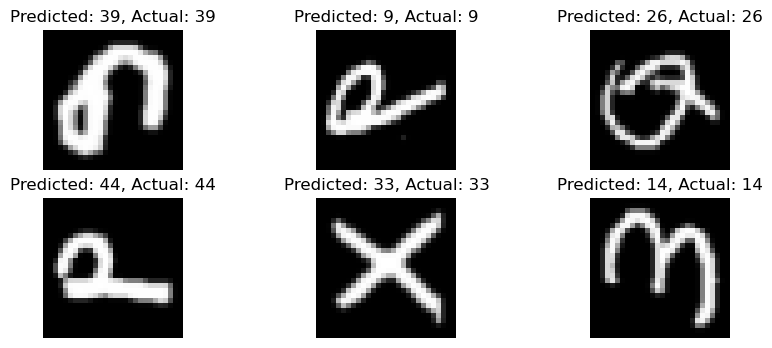

In [137]:
import matplotlib.pyplot as plt


predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)


plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[i].squeeze(), cmap="gray")
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")
    plt.axis("off")
plt.show()
